This notebook demonstrates some kernels from the GPytorch package

In [1]:
import os
import sys
import math
import torch
import gpytorch
%load_ext autoreload
%autoreload 2

import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('precision', 0)
pd.set_option('display.float_format', lambda x: '%.16f' % x)

# Start the notebook from the root of the project
if 'notebooks' in os.getcwd():
    os.chdir(os.path.dirname(os.getcwd()))
    if os.getcwd().endswith('notebooks'):
        os.chdir(os.path.dirname(os.getcwd()))

# Local imports (i.e., my code) from the src folder
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from plot_helpers import *
plotter = PlotUtilGPyTorch()

In [2]:
covar_module = gpytorch.kernels.PeriodicKernel()
covar_module.period_length = 1.7
covar_module.lengthscale = 0.1
covar_module = gpytorch.kernels.ScaleKernel(covar_module)

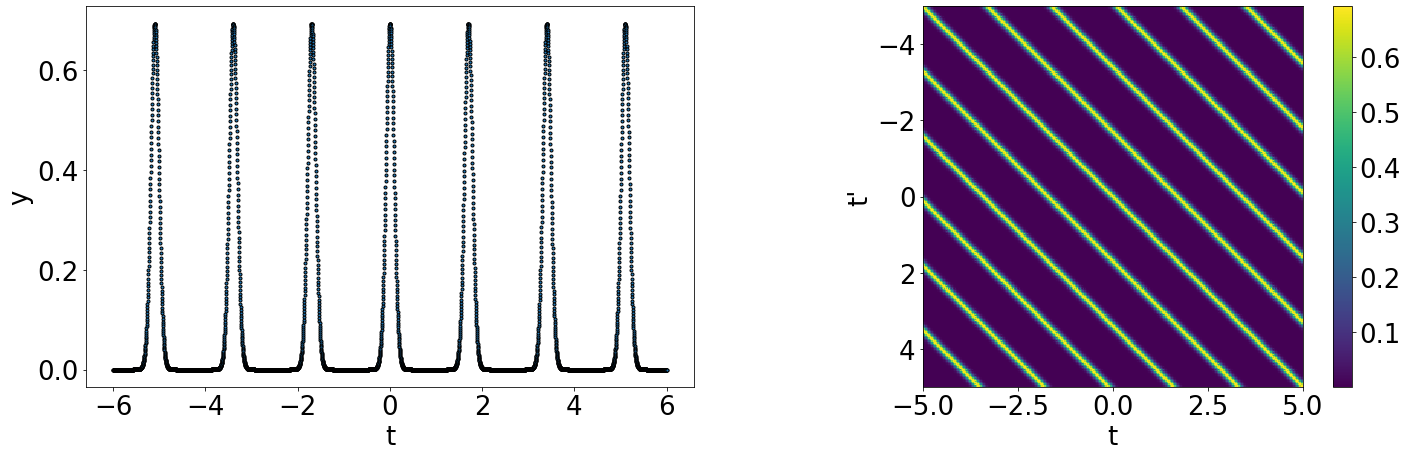

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(covar_module, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(covar_module, fig, ax2)

# Predict evenly spaced points on our time-axis
# TODO: fix function!
# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(X_part, Y_part, likelihood)

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    plotter.plot_kernel_samples(covar_module, 100, 5)

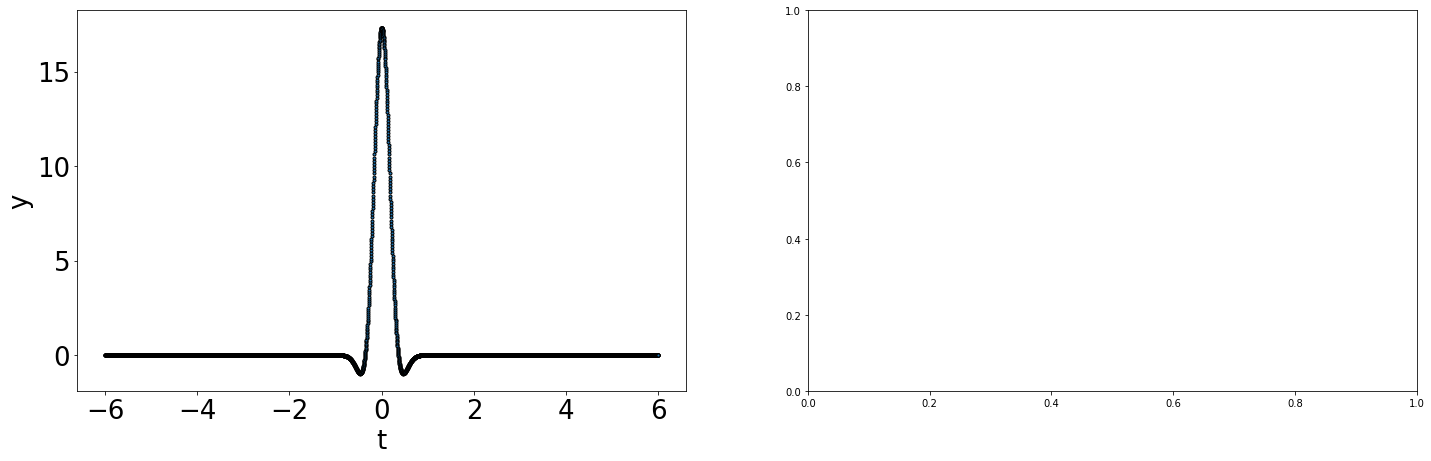

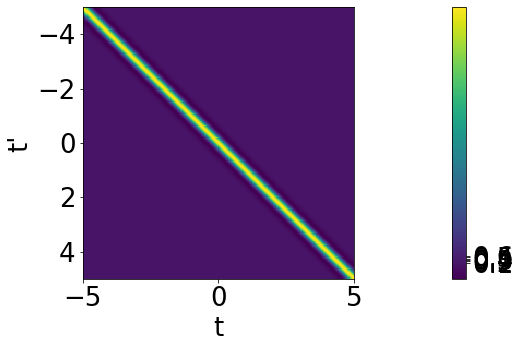

In [4]:
NUM_MIXTURES=25
covar_module = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=NUM_MIXTURES)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(covar_module, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(covar_module, ax2)

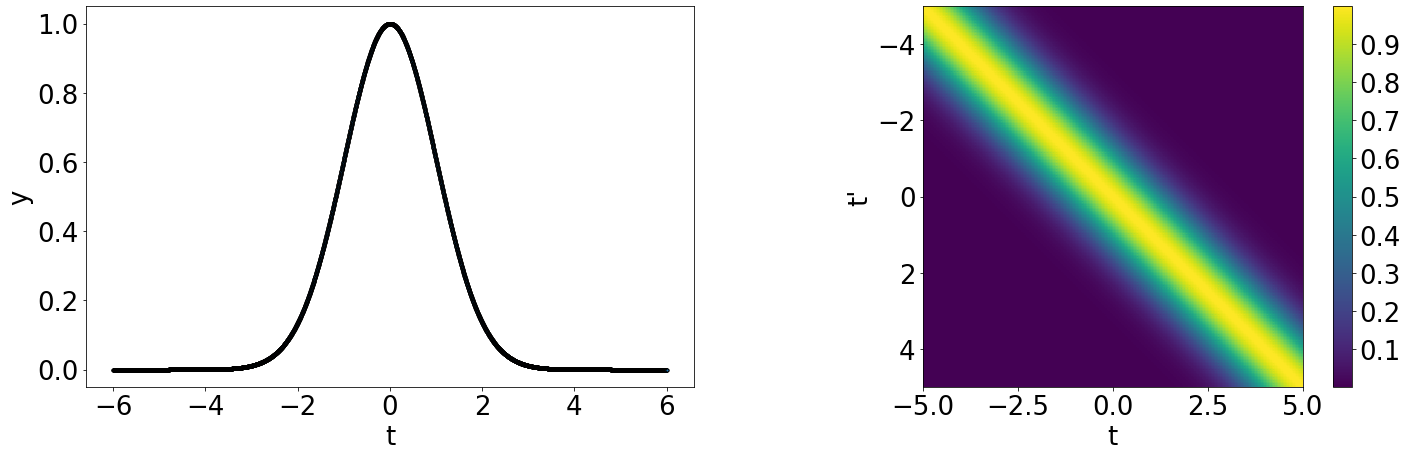

In [12]:
covar_module = gpytorch.kernels.RBFKernel()
covar_module.lengthscale=1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(covar_module, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(covar_module, fig, ax2, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

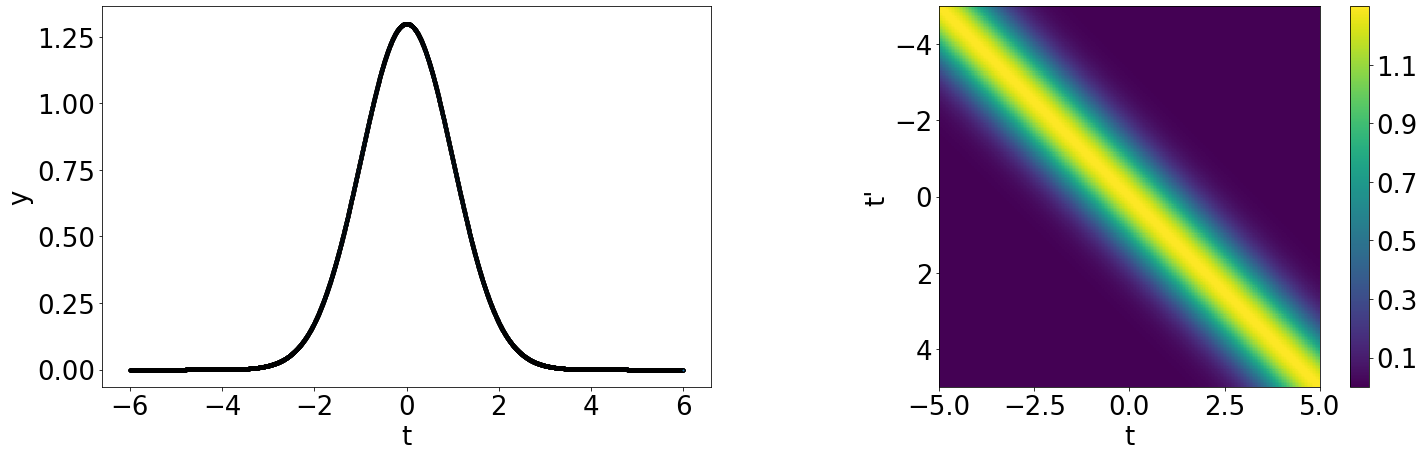

In [15]:
covar_module = gpytorch.kernels.RBFKernel()
covar_module.lengthscale=1
covar_module = gpytorch.kernels.ScaleKernel(covar_module)
covar_module.outputscale=1.3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(covar_module, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(covar_module, fig, ax2, [0.1, 0.3, 0.5, 0.7,0.9, 1.1])

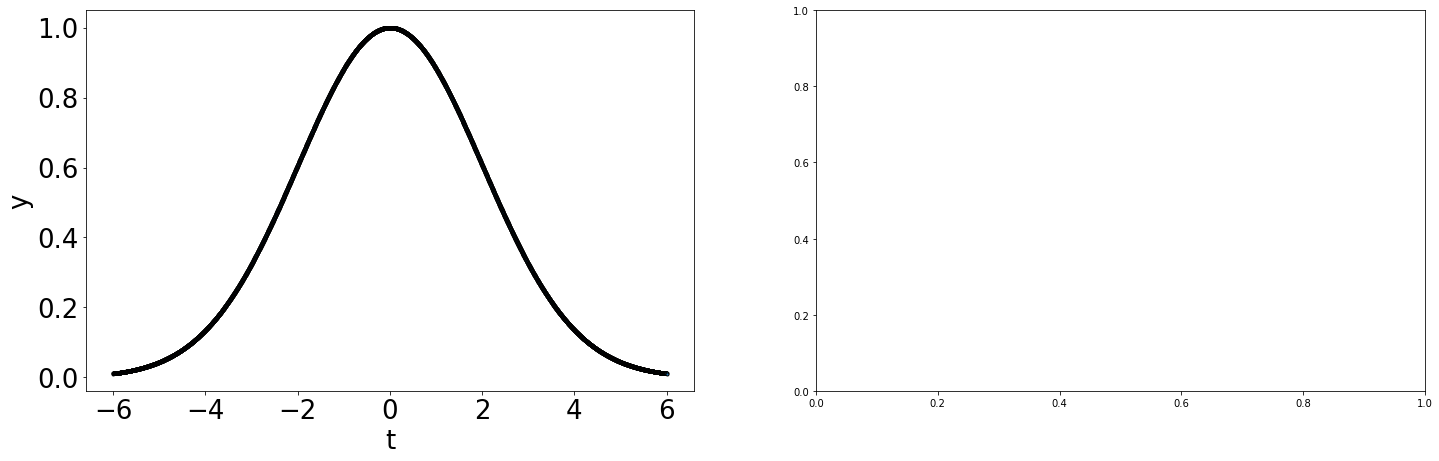

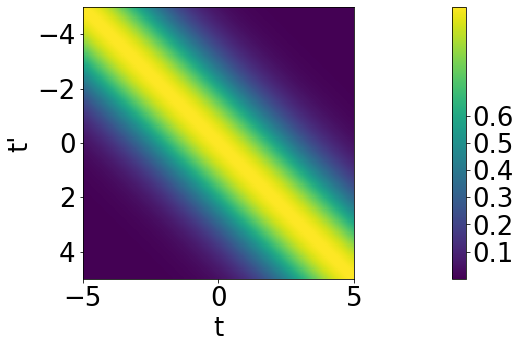

In [7]:
covar_module = gpytorch.kernels.RBFKernel()
covar_module.lengthscale=2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(covar_module, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(covar_module, ax2)

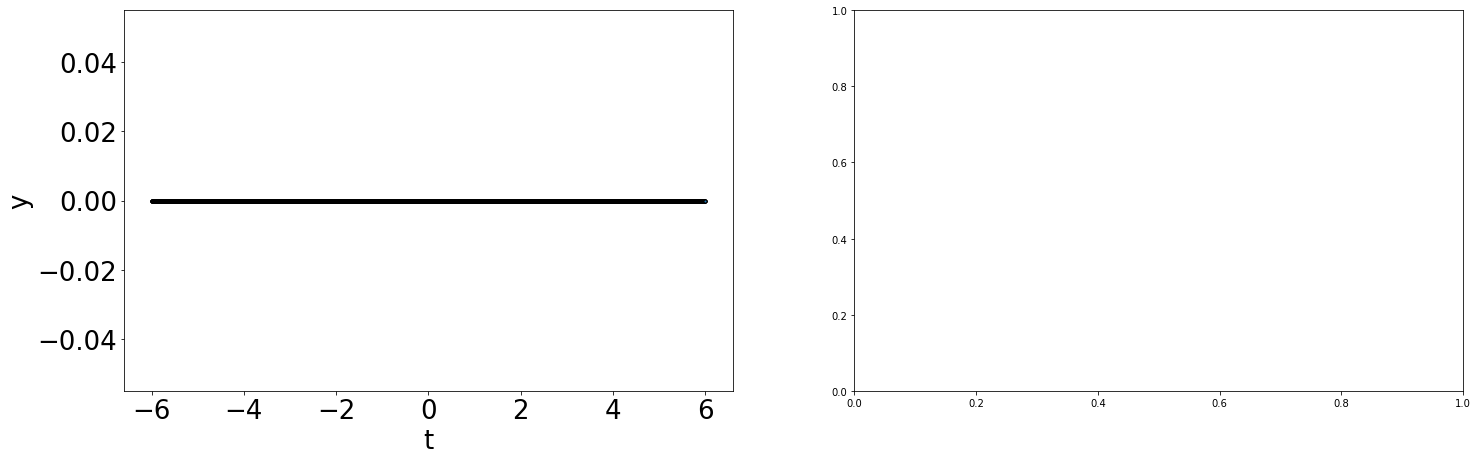

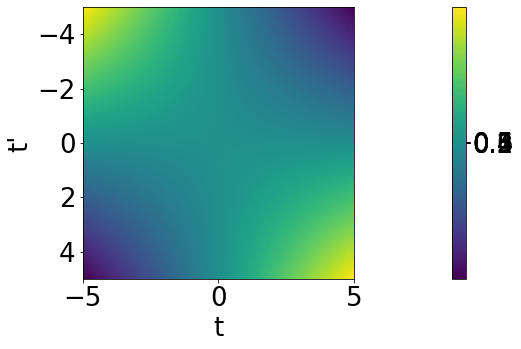

In [8]:
covar_module = gpytorch.kernels.LinearKernel()
covar_module.variance=2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))
plotter.plot_1d_kernel(covar_module, ax=ax1, label="covariance between 0 and x")
plotter.plot_2d_kernel(covar_module, ax2)